In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, auc, precision_score, recall_score, f1_score, accuracy_score, ConfusionMatrixDisplay
from sklearn.feature_selection import f_classif
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from scipy.stats import chi2_contingency
pd.options.display.max_columns = None
import toad

# Read data

In [3]:
data = pd.read_csv('data/lc_loan.csv')

C:\Users\uyenn\AppData\Local\Temp\ipykernel_3892\1273589125.py:1: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('data/lc_loan.csv')


In [4]:
data.shape 

(887379, 74)

In [5]:
num_features = data.select_dtypes(include=['int64', 'float64'])
print('The number of numerical features is {}'.format(num_features.shape[1]))

The number of numerical features is 51


In [6]:
num_features.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,887379.0,3.246513e+07,2.282734e+07,54734.00,9.206643e+06,3.443327e+07,5.490814e+07,6.861706e+07
member_id,887379.0,3.500182e+07,2.411335e+07,70473.00,1.087713e+07,3.709528e+07,5.847135e+07,7.354484e+07
loan_amnt,887379.0,1.475526e+04,8.435456e+03,500.00,8.000000e+03,1.300000e+04,2.000000e+04,3.500000e+04
funded_amnt,887379.0,1.474188e+04,8.429898e+03,500.00,8.000000e+03,1.300000e+04,2.000000e+04,3.500000e+04
funded_amnt_inv,887379.0,1.470246e+04,8.442107e+03,0.00,8.000000e+03,1.300000e+04,2.000000e+04,3.500000e+04
int_rate,887379.0,1.324674e+01,4.381867e+00,5.32,9.990000e+00,1.299000e+01,1.620000e+01,2.899000e+01
installment,887379.0,4.367171e+02,2.441866e+02,15.67,2.607050e+02,3.825500e+02,5.726000e+02,1.445460e+03
annual_inc,887375.0,7.502759e+04,6.469830e+04,0.00,4.500000e+04,6.500000e+04,9.000000e+04,9.500000e+06
dti,887379.0,1.815704e+01,1.719063e+01,0.00,1.191000e+01,1.765000e+01,2.395000e+01,9.999000e+03
delinq_2yrs,887350.0,3.144419e-01,8.622438e-01,0.00,0.000000e+00,0.000000e+00,0.000000e+00,3.900000e+01


In [7]:
cat_features = data.select_dtypes(include=['object'])
print('The number of categorical features is {}'.format(cat_features.shape[1]))

The number of categorical features is 23


In [8]:
cat_features.describe().transpose()

,count,unique,top,freq
term,887379,2,36 months,621125
grade,887379,7,B,254535
sub_grade,887379,35,B3,56323
emp_title,835917,299271,Teacher,13469
emp_length,842554,11,10+ years,291569
home_ownership,887379,6,MORTGAGE,443557
verification_status,887379,3,Source Verified,329558
issue_d,887379,103,Oct-2015,48631
loan_status,887379,10,Current,601779
pymnt_plan,887379,2,n,887369


In [9]:
data['application_type'].value_counts(normalize=True)

application_type
INDIVIDUAL    0.999424
JOINT         0.000576
Name: proportion, dtype: float64

In [10]:
data['pymnt_plan'].value_counts(normalize=True)

pymnt_plan
n    0.999989
y    0.000011
Name: proportion, dtype: float64

In [11]:
data['policy_code'].value_counts(normalize=True)

policy_code
1.0    1.0
Name: proportion, dtype: float64

In [12]:
data['issue_d'] = pd.to_datetime(data['issue_d'], format='%b-%Y') 
data['issue_d']

0        2011-12-01
1        2011-12-01
2        2011-12-01
3        2011-12-01
4        2011-12-01
            ...    
887374   2015-01-01
887375   2015-01-01
887376   2015-01-01
887377   2015-01-01
887378   2015-01-01
Name: issue_d, Length: 887379, dtype: datetime64[ns]

<!-- # Remove features cause Data Leakage -->

# Define target variables

In [17]:
data['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off', 'Issued'],
      dtype=object)

In [18]:
data['loan_status'].value_counts(normalize=True) * 100

loan_status
Current                                                67.815330
Fully Paid                                             23.408600
Charged Off                                             5.099061
Late (31-120 days)                                      1.306206
Issued                                                  0.953369
In Grace Period                                         0.704659
Late (16-30 days)                                       0.265614
Does not meet the credit policy. Status:Fully Paid      0.224031
Default                                                 0.137371
Does not meet the credit policy. Status:Charged Off     0.085758
Name: proportion, dtype: float64

In [19]:
good_status = ['Fully Paid', 'Current', 'In Grace Period', 
               'Does not meet the credit policy. Status:Fully Paid', 'Issued']

bad_status = ['Charged Off', 'Default', 'Late (31-120 days)', 
              'Late (16-30 days)', 'Does not meet the credit policy. Status:Charged Off']

In [20]:
data['target'] = np.where(data['loan_status'].isin(bad_status), 0, 1)
data['target'].value_counts(normalize=True)
data.drop(columns = ['loan_status'], inplace = True)

In [21]:
data['target'].value_counts(normalize=True) * 100

target
1    93.10599
0     6.89401
Name: proportion, dtype: float64

# Train - test split

In [22]:
# data = pd.concat([data, issue_d], axis=1)
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,target
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,2011-12-01,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,2011-12-01,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,2011-12-01,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,2011-12-01,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,2011-12-01,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


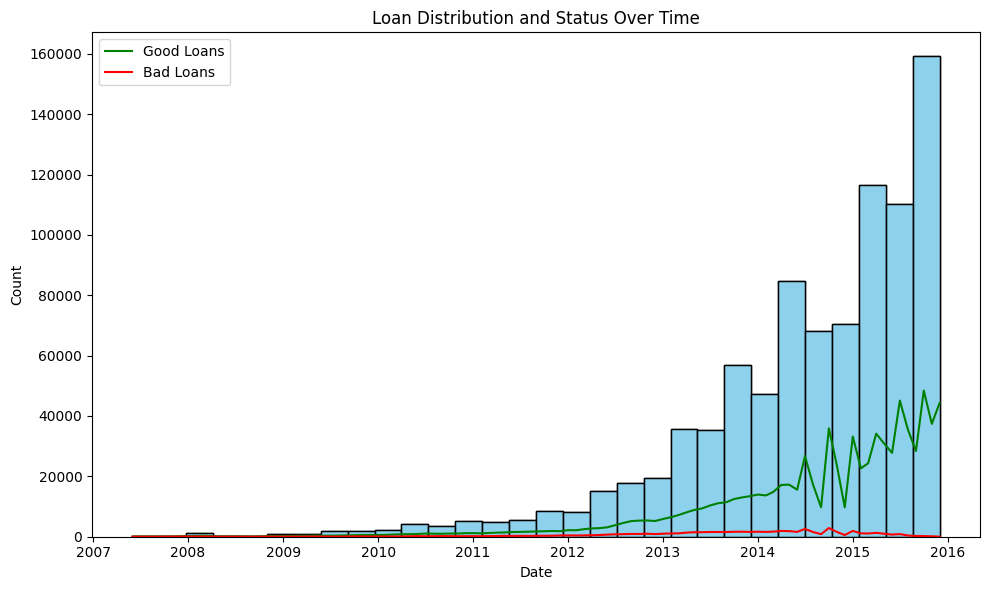

In [23]:
# Plotting
plt.figure(figsize=(10, 6))

# Histogram with loan distribution over time
sns.histplot(data=data, x='issue_d', bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Date')
plt.ylabel('Count', color='skyblue')
plt.title('Loan Distribution and Status Over Time')

# Line plot for good loans
sns.histplot(data=data, x='issue_d', bins=30, color='skyblue', edgecolor='black')
good_loans = data[data['target'] == 1].groupby('issue_d').size().reset_index(name='Count')
sns.lineplot(data=good_loans, x='issue_d', y='Count', color='green', label='Good Loans')

# Line plot for bad loans
bad_loans = data[data['target'] == 0].groupby('issue_d').size().reset_index(name='Count')
sns.lineplot(data=bad_loans, x='issue_d', y='Count', color='red', label='Bad Loans')

plt.ylabel('Count', color='black')
plt.legend()
plt.tight_layout()
plt.show()

In [24]:
data['year'] = data['issue_d'].dt.year
loan_counts_by_year = data.groupby('year')['issue_d'].count()
print(loan_counts_by_year)

year
2007       603
2008      2393
2009      5281
2010     12537
2011     21721
2012     53367
2013    134755
2014    235628
2015    421094
Name: issue_d, dtype: int64


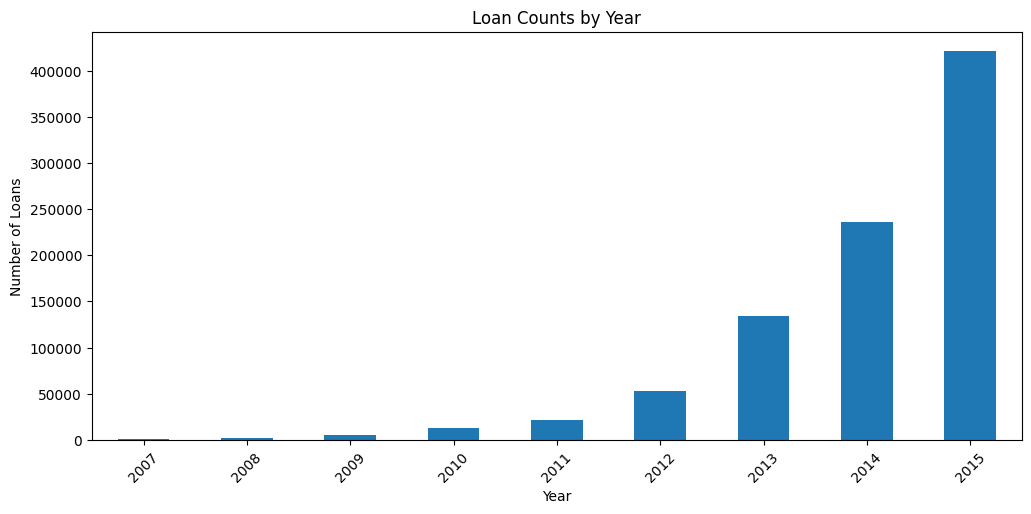

In [25]:
loan_counts_by_year = data.groupby('year')['issue_d'].count()

plt.figure(figsize=(12, 6))
loan_counts_by_year.plot(kind='bar')

plt.xlabel('Year')
plt.ylabel('Number of Loans')
plt.title('Loan Counts by Year')

plt.xticks(rotation=45)

plt.subplots_adjust(bottom=0.2)

plt.show()

In [26]:
train, test = np.split(data, [int(.80 * len(data))])

d:\credit_score\back\.venv\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [27]:
train.shape, test.shape

((709903, 75), (177476, 75))

In [28]:
train['set'] = 'train'
test['set'] = 'test'

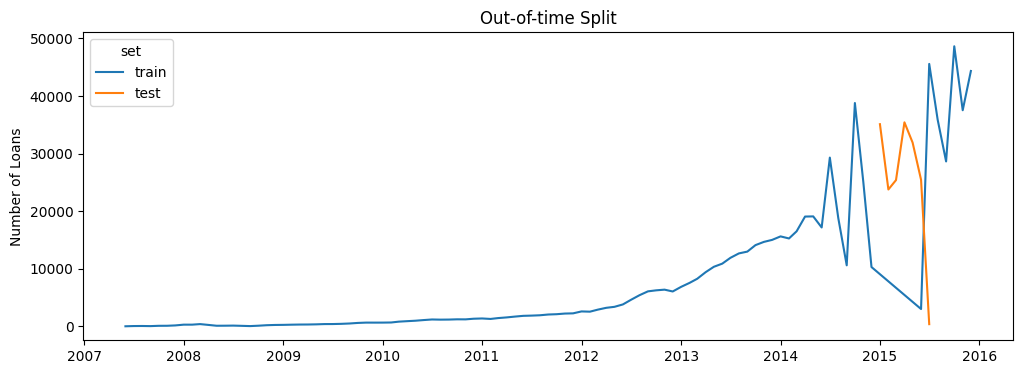

In [29]:
train_test = pd.concat([train, test])
train_test = train_test.groupby(['issue_d', 'set'])['target'].count().reset_index()

fig, ax = plt.subplots(figsize=(12, 4))
plt.title('Out-of-time Split')
sns.lineplot(train_test, x='issue_d', y='target', hue='set', ax=ax)
plt.xlabel('')
plt.ylabel('Number of Loans')
plt.grid(False)
plt.show()

In [30]:
train.drop(columns=['set', 'year'], inplace=True)
train.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,target
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,2011-12-01,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,2011-12-01,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,2011-12-01,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,2011-12-01,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,2011-12-01,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [31]:
test.drop(columns=['set', 'year'], inplace=True)
test.shape

(177476, 74)

# Save data

In [32]:
train.to_csv('data/train.csv', index=False)
test.to_csv('data/test.csv', index=False)